In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [58]:
from pyecharts.charts import Map, Bar, Pie, Scatter, HeatMap
from pyecharts import options as opts
import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv('house.csv')
data.head()

,产权,关注,区域,单价,小区,年限,总价/万元,户型,房屋编码,挂牌时间,朝向,楼层,装修情况,面积
0,70年,0,余杭临平,21015元/平米,众安理想湾,2015年建/板楼,210.0,3室2厅,103105013026,2019-06-12,南 北,低楼层/共33层,平层/精装,99.93平米
1,70年,4,余杭临平,28416元/平米,众安理想湾,2016年建/板塔结合,780.0,6室2厅,103104324906,2019-04-04,南,联排/共3层,毛坯,274.5平米
2,70年,2,余杭临平,17323元/平米,众安理想湾,2015年建/板楼,220.0,3室2厅,103102855120,2018-09-07,南,高楼层/共33层,精装,127平米
3,70年,4,余杭临平,18249元/平米,众安理想湾,2015年建/塔楼,250.0,3室2厅,103102737121,2018-08-15,南,中楼层/共33层,简装,137平米
4,70年,1,余杭临平,24112元/平米,众安理想湾,2015年建/板楼,215.0,3室2厅,103104498162,2019-04-21,南,高楼层/共34层,精装,89.17平米


In [60]:
data.shape

(30771, 14)

In [61]:
data.isna().sum()

产权       0
关注       0
区域       1
单价       0
小区       1
年限       0
总价/万元    0
户型       0
房屋编码     0
挂牌时间     0
朝向       0
楼层       0
装修情况     0
面积       0
dtype: int64

In [62]:
data[data['区域'].isna()]

,产权,关注,区域,单价,小区,年限,总价/万元,户型,房屋编码,挂牌时间,朝向,楼层,装修情况,面积
11372,未知,1,NaN,27000元/平米,NaN,2015年建/板楼,351.0,4室2厅,103102775203,2018-08-23,南,低楼层/共17层,平层/毛坯,130平米


In [63]:
data.dropna(inplace=True)

In [64]:
data[data['产权'] == '未知']

,产权,关注,区域,单价,小区,年限,总价/万元,户型,房屋编码,挂牌时间,朝向,楼层,装修情况,面积
4008,未知,9,余杭未来科技城,19663元/平米,恒腾悦湖花苑,未知年建/板楼,355.0,4室2厅,103103978291,2019-02-27,南,高楼层/共20层,跃层/毛坯,180.55平米
4010,未知,4,余杭未来科技城,19940元/平米,恒腾悦湖花苑,未知年建/板楼,360.0,5室2厅,103104664322,2019-05-08,南 北,高楼层/共20层,复式/毛坯,180.55平米
17462,未知,72,西湖良渚,31736元/平米,都市阳光华苑,未知年建/板塔结合,194.0,2室2厅,103104851976,2019-05-27,南,中楼层/共28层,平层/精装,61.13平米
26271,未知,33,西湖良渚,29047元/平米,都市阳光乐苑,未知年建/板楼,180.0,2室2厅,103102708243,2018-08-08,南,中楼层/共28层,平层/毛坯,61.97平米
26273,未知,36,西湖良渚,29782元/平米,都市阳光乐苑,未知年建/板楼,185.0,2室1厅,103104458524,2019-04-17,南,中楼层/共28层,平层/简装,62.12平米
26274,未知,2,西湖良渚,31936元/平米,都市阳光乐苑,未知年建/板楼,198.0,2室2厅,103104887918,2019-05-31,东南,高楼层/共28层,平层/简装,62平米
26276,未知,27,西湖良渚,29615元/平米,都市阳光乐苑,未知年建/板楼,185.0,2室2厅,103102887783,2018-09-09,南,低楼层/共28层,简装,62.47平米


In [65]:
data = data[data['产权'] != '未知']
data.shape

(30763, 14)

In [66]:
def transloc(address):
    if '临安' in address: return '临安市'
    elif '上城' in address: return '上城区'
    elif '下城' in address: return '下城区'
    elif '江干' in address: return '江干区'
    elif '拱墅' in address: return '拱墅区'
    elif '西湖' in address: return '西湖区'
    elif '滨江' in address: return '滨江区'
    elif '萧山' in address: return '萧山区'
    elif '余杭' in address: return '余杭区'
    elif '富阳' in address: return '富阳市'
    elif '钱塘' in address: return '钱塘新区'
    else: return '其他'

In [67]:
data['地理位置'] = data['区域'].apply(transloc)

In [68]:
data['单价数字'] = data['单价'].astype(str).str.extract(r'(\d+)').astype(float)

In [69]:
data.head()

,产权,关注,区域,单价,小区,年限,总价/万元,户型,房屋编码,挂牌时间,朝向,楼层,装修情况,面积,地理位置,单价数字
0,70年,0,余杭临平,21015元/平米,众安理想湾,2015年建/板楼,210.0,3室2厅,103105013026,2019-06-12,南 北,低楼层/共33层,平层/精装,99.93平米,余杭区,21015.0
1,70年,4,余杭临平,28416元/平米,众安理想湾,2016年建/板塔结合,780.0,6室2厅,103104324906,2019-04-04,南,联排/共3层,毛坯,274.5平米,余杭区,28416.0
2,70年,2,余杭临平,17323元/平米,众安理想湾,2015年建/板楼,220.0,3室2厅,103102855120,2018-09-07,南,高楼层/共33层,精装,127平米,余杭区,17323.0
3,70年,4,余杭临平,18249元/平米,众安理想湾,2015年建/塔楼,250.0,3室2厅,103102737121,2018-08-15,南,中楼层/共33层,简装,137平米,余杭区,18249.0
4,70年,1,余杭临平,24112元/平米,众安理想湾,2015年建/板楼,215.0,3室2厅,103104498162,2019-04-21,南,高楼层/共34层,精装,89.17平米,余杭区,24112.0


In [70]:
data['起建时间'] = data['年限'].str.split('/').str[0]
data['建筑类型'] = data['年限'].str.split('/').str[1]

In [71]:
data['起建时间'].value_counts()

未知年建      2931
2016年建    2615
2014年建    1831
2015年建    1701
2010年建    1700
2013年建    1670
2017年建    1657
2012年建    1590
2000年建    1280
2007年建    1228
2008年建    1206
2006年建    1164
2011年建    1087
2009年建    1084
2005年建     932
1998年建     925
2003年建     642
2004年建     642
2018年建     589
1996年建     535
1995年建     474
1999年建     396
1997年建     366
2002年建     353
1988年建     352
1989年建     328
1990年建     216
1993年建     209
2001年建     180
1994年建     157
1985年建     153
1986年建     134
1992年建      93
1991年建      85
1987年建      67
2019年建      50
1984年建      41
1982年建      37
1983年建      32
1980年建      16
1981年建       9
1973年建       2
1978年建       2
1977年建       1
1964年建       1
Name: 起建时间, dtype: int64

In [72]:
data['建筑类型'].value_counts()

板楼      25123
塔楼       2643
板塔结合     2245
暂无数据      698
平房         54
Name: 建筑类型, dtype: int64

In [73]:
data = data.loc[(data['起建时间'] != '未知年建') & (data['建筑类型'] != '暂无数据')]

In [74]:
data.head()

,产权,关注,区域,单价,小区,年限,总价/万元,户型,房屋编码,挂牌时间,朝向,楼层,装修情况,面积,地理位置,单价数字,起建时间,建筑类型
0,70年,0,余杭临平,21015元/平米,众安理想湾,2015年建/板楼,210.0,3室2厅,103105013026,2019-06-12,南 北,低楼层/共33层,平层/精装,99.93平米,余杭区,21015.0,2015年建,板楼
1,70年,4,余杭临平,28416元/平米,众安理想湾,2016年建/板塔结合,780.0,6室2厅,103104324906,2019-04-04,南,联排/共3层,毛坯,274.5平米,余杭区,28416.0,2016年建,板塔结合
2,70年,2,余杭临平,17323元/平米,众安理想湾,2015年建/板楼,220.0,3室2厅,103102855120,2018-09-07,南,高楼层/共33层,精装,127平米,余杭区,17323.0,2015年建,板楼
3,70年,4,余杭临平,18249元/平米,众安理想湾,2015年建/塔楼,250.0,3室2厅,103102737121,2018-08-15,南,中楼层/共33层,简装,137平米,余杭区,18249.0,2015年建,塔楼
4,70年,1,余杭临平,24112元/平米,众安理想湾,2015年建/板楼,215.0,3室2厅,103104498162,2019-04-21,南,高楼层/共34层,精装,89.17平米,余杭区,24112.0,2015年建,板楼


In [75]:
data.shape

(27580, 18)

In [76]:
from datetime import datetime

data['楼龄'] = datetime.now().year - data['起建时间'].str.extract(r'(\d+)').astype(int)
data.head()

,产权,关注,区域,单价,小区,年限,总价/万元,户型,房屋编码,挂牌时间,朝向,楼层,装修情况,面积,地理位置,单价数字,起建时间,建筑类型,楼龄
0,70年,0,余杭临平,21015元/平米,众安理想湾,2015年建/板楼,210.0,3室2厅,103105013026,2019-06-12,南 北,低楼层/共33层,平层/精装,99.93平米,余杭区,21015.0,2015年建,板楼,5
1,70年,4,余杭临平,28416元/平米,众安理想湾,2016年建/板塔结合,780.0,6室2厅,103104324906,2019-04-04,南,联排/共3层,毛坯,274.5平米,余杭区,28416.0,2016年建,板塔结合,4
2,70年,2,余杭临平,17323元/平米,众安理想湾,2015年建/板楼,220.0,3室2厅,103102855120,2018-09-07,南,高楼层/共33层,精装,127平米,余杭区,17323.0,2015年建,板楼,5
3,70年,4,余杭临平,18249元/平米,众安理想湾,2015年建/塔楼,250.0,3室2厅,103102737121,2018-08-15,南,中楼层/共33层,简装,137平米,余杭区,18249.0,2015年建,塔楼,5
4,70年,1,余杭临平,24112元/平米,众安理想湾,2015年建/板楼,215.0,3室2厅,103104498162,2019-04-21,南,高楼层/共34层,精装,89.17平米,余杭区,24112.0,2015年建,板楼,5


In [77]:
data = data.drop(['年限', '起建时间'], axis=1)

In [78]:
data["户型"].str.findall("(\d)室(\d)厅")

0        [(3, 2)]
1        [(6, 2)]
2        [(3, 2)]
3        [(3, 2)]
4        [(3, 2)]
           ...   
30762    [(3, 2)]
30765    [(3, 2)]
30766    [(2, 2)]
30768    [(5, 2)]
30769    [(5, 3)]
Name: 户型, Length: 27580, dtype: object

In [79]:
data['室数'] = data["户型"].str.findall("(\d+)室(\d+)厅").str[0].str[0].astype(int)
data['厅数'] = data["户型"].str.findall("(\d+)室(\d+)厅").str[0].str[1].astype(int)

In [80]:
data.drop(['房屋编码'], axis=1, inplace=True)

In [81]:
data['挂牌时间'] = pd.to_datetime(data['挂牌时间'], infer_datetime_format=True)

In [82]:
data['朝向'] = data['朝向'].str.split().apply(tuple)

In [83]:
data['楼层'].value_counts().to_dict()

{'高楼层/共6层': 1632,
 '高楼层/共7层': 1217,
 '中楼层/共7层': 1215,
 '低楼层/共6层': 1083,
 '中楼层/共6层': 1062,
 '高楼层/共18层': 857,
 '中楼层/共11层': 832,
 '低楼层/共18层': 832,
 '中楼层/共18层': 810,
 '低楼层/共7层': 687,
 '中楼层/共5层': 680,
 '低楼层/共11层': 564,
 '中楼层/共16层': 544,
 '高楼层/共11层': 519,
 '高楼层/共16层': 478,
 '低楼层/共16层': 466,
 '中楼层/共17层': 437,
 '低楼层/共17层': 346,
 '高楼层/共17层': 332,
 '高楼层/共5层': 316,
 '中楼层/共23层': 277,
 '低楼层/共27层': 263,
 '中楼层/共27层': 253,
 '低楼层/共33层': 251,
 '高楼层/共24层': 250,
 '中楼层/共24层': 242,
 '高楼层/共33层': 242,
 '中楼层/共20层': 234,
 '中楼层/共26层': 233,
 '中楼层/共22层': 232,
 '中楼层/共28层': 232,
 '低楼层/共24层': 228,
 '高楼层/共32层': 227,
 '高楼层/共27层': 224,
 '高楼层/共23层': 224,
 '中楼层/共33层': 224,
 '低楼层/共26层': 222,
 '低楼层/共5层': 213,
 '中楼层/共15层': 210,
 '低楼层/共23层': 209,
 '中楼层/共32层': 206,
 '低楼层/共15层': 201,
 '低楼层/共22层': 200,
 '高楼层/共15层': 197,
 '低楼层/共32层': 195,
 '高楼层/共22层': 193,
 '低楼层/共25层': 192,
 '高楼层/共26层': 192,
 '中楼层/共25层': 191,
 '高楼层/共25层': 186,
 '高楼层/共28层': 185,
 '中楼层/共10层': 185,
 '高楼层/共20层': 182,
 '中楼层/共14层': 176,
 '低楼层/共30层': 172,
 '低楼层/共28层': 1

In [84]:
data = data.loc[data['楼层'].str.contains('/')]
data.shape

(27565, 18)

In [85]:
data['楼层位置'] = data['楼层'].str.split('/').str[0]
data['层数'] = data['楼层'].str.split('/').str[1].str.extract(r'(\d+)').astype(int)

In [86]:
data.head()

,产权,关注,区域,单价,小区,总价/万元,户型,挂牌时间,朝向,楼层,装修情况,面积,地理位置,单价数字,建筑类型,楼龄,室数,厅数,楼层位置,层数
0,70年,0,余杭临平,21015元/平米,众安理想湾,210.0,3室2厅,2019-06-12,"(南, 北)",低楼层/共33层,平层/精装,99.93平米,余杭区,21015.0,板楼,5,3,2,低楼层,33
1,70年,4,余杭临平,28416元/平米,众安理想湾,780.0,6室2厅,2019-04-04,"(南,)",联排/共3层,毛坯,274.5平米,余杭区,28416.0,板塔结合,4,6,2,联排,3
2,70年,2,余杭临平,17323元/平米,众安理想湾,220.0,3室2厅,2018-09-07,"(南,)",高楼层/共33层,精装,127平米,余杭区,17323.0,板楼,5,3,2,高楼层,33
3,70年,4,余杭临平,18249元/平米,众安理想湾,250.0,3室2厅,2018-08-15,"(南,)",中楼层/共33层,简装,137平米,余杭区,18249.0,塔楼,5,3,2,中楼层,33
4,70年,1,余杭临平,24112元/平米,众安理想湾,215.0,3室2厅,2019-04-21,"(南,)",高楼层/共34层,精装,89.17平米,余杭区,24112.0,板楼,5,3,2,高楼层,34


In [87]:
data['产权'].value_counts()

70年    23398
40年     3118
50年     1049
Name: 产权, dtype: int64

<AxesSubplot:>

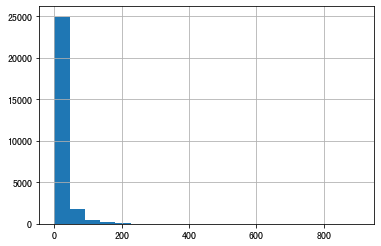

In [88]:
data['关注'].hist(bins=20)

In [89]:
data = data.loc[data['楼层位置'].isin(['高楼层', '中楼层', '低楼层'])]
data.drop(['楼层'], axis=1, inplace=True)

In [90]:
data.shape

(27326, 19)

In [92]:
data['装修情况'].value_counts()

平层/精装      9907
平层/简装      6837
精装         2927
简装         2355
平层/毛坯      2314
跃层/精装       850
毛坯          558
跃层/简装       357
平层/其他       344
复式/精装       216
跃层/毛坯       192
其他          183
复式/简装        59
Loft/精装      55
错层/精装        46
错层/简装        45
复式/毛坯        28
Loft/简装      18
跃层/其他        16
Loft/其他       7
复式/其他         4
错层/毛坯         4
错层/其他         3
Loft/毛坯       1
Name: 装修情况, dtype: int64

In [93]:
def parse_decoration(s):
    if '精装' in s: return '精装'
    elif '简装' in s: return '简装'
    elif '毛坯' in s: return '毛坯'
    else: return '其他'

data['装修情况_关键词'] = data['装修情况'].apply(parse_decoration)

In [94]:
data = data.loc[data['装修情况_关键词'] != '其他']
data.shape

(26769, 20)

In [104]:
data['面积'] = data['面积'].str[:-2].astype(float)

In [106]:
data.head()

,产权,关注,区域,单价,小区,总价/万元,户型,挂牌时间,朝向,装修情况,面积,地理位置,单价数字,建筑类型,楼龄,室数,厅数,楼层位置,层数,装修情况_关键词
0,70年,0,余杭临平,21015元/平米,众安理想湾,210.0,3室2厅,2019-06-12,"(南, 北)",平层/精装,99.93,余杭区,21015.0,板楼,5,3,2,低楼层,33,精装
2,70年,2,余杭临平,17323元/平米,众安理想湾,220.0,3室2厅,2018-09-07,"(南,)",精装,127.00,余杭区,17323.0,板楼,5,3,2,高楼层,33,精装
3,70年,4,余杭临平,18249元/平米,众安理想湾,250.0,3室2厅,2018-08-15,"(南,)",简装,137.00,余杭区,18249.0,塔楼,5,3,2,中楼层,33,简装
4,70年,1,余杭临平,24112元/平米,众安理想湾,215.0,3室2厅,2019-04-21,"(南,)",精装,89.17,余杭区,24112.0,板楼,5,3,2,高楼层,34,精装
5,70年,1,余杭临平,24882元/平米,众安理想湾,220.0,3室2厅,2019-06-03,"(南,)",平层/精装,88.42,余杭区,24882.0,塔楼,5,3,2,低楼层,34,精装


In [107]:
candidates = ["地理位置", "区域", "总价/万元", "单价数字", "面积", "楼龄", "建筑类型", "楼层位置", "层数", "装修情况_关键词", "室数", "厅数", "朝向", "产权", "户型", "关注"]
df = data[candidates]

<AxesSubplot:>

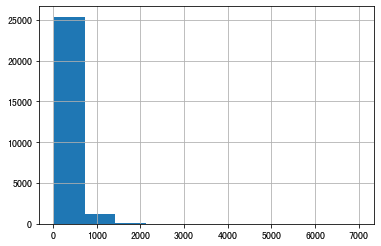

In [108]:
df['总价/万元'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x129a79780>,
 'caps': [<matplotlib.lines.Line2D at 0x129a6c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x129a79fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x129a6ce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x129a622e8>],
 'means': []}

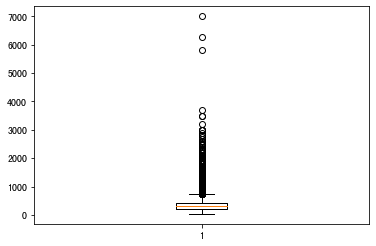

In [110]:
plt.boxplot(df['总价/万元'])

In [114]:
df['户型'].value_counts()

3室2厅    8123
2室1厅    4801
2室2厅    3695
1室1厅    3174
4室2厅    2672
3室1厅    2506
5室2厅     474
1室0厅     398
4室1厅     289
5室3厅     131
1室2厅      93
6室2厅      78
4室3厅      78
2室0厅      69
5室1厅      48
6室3厅      30
3室3厅      27
7室2厅      13
3室0厅      12
6室1厅       9
5室4厅       8
6室4厅       8
7室3厅       7
7室4厅       3
2室3厅       3
5室5厅       3
9室1厅       2
8室2厅       2
8室5厅       2
0室0厅       2
8室4厅       2
0室1厅       1
9室0厅       1
2室4厅       1
8室3厅       1
5室0厅       1
7室5厅       1
7室1厅       1
Name: 户型, dtype: int64

In [118]:
df.head()

,地理位置,区域,总价/万元,单价数字,面积,楼龄,建筑类型,楼层位置,层数,装修情况_关键词,室数,厅数,朝向,产权,户型,关注
0,余杭区,余杭临平,210.0,21015.0,99.93,5,板楼,低楼层,33,精装,3,2,"(南, 北)",70年,3室2厅,0
2,余杭区,余杭临平,220.0,17323.0,127.00,5,板楼,高楼层,33,精装,3,2,"(南,)",70年,3室2厅,2
3,余杭区,余杭临平,250.0,18249.0,137.00,5,塔楼,中楼层,33,简装,3,2,"(南,)",70年,3室2厅,4
4,余杭区,余杭临平,215.0,24112.0,89.17,5,板楼,高楼层,34,精装,3,2,"(南,)",70年,3室2厅,1
5,余杭区,余杭临平,220.0,24882.0,88.42,5,塔楼,低楼层,34,精装,3,2,"(南,)",70年,3室2厅,1


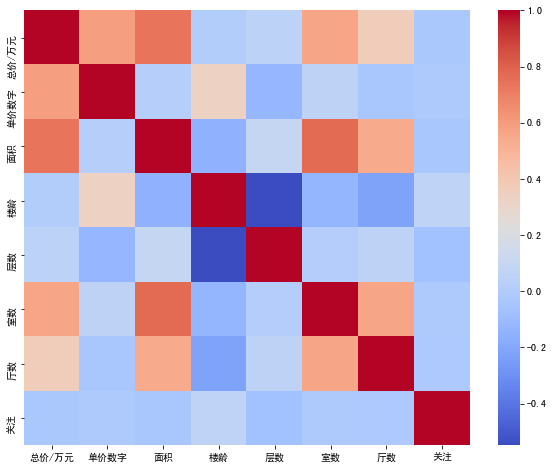

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm') # good cmap can be more effective: seismic, bwr, coolwarm, RdGy
plt.show()

In [153]:
# count_area = df.groupby("地理位置")["关注"].count().sort_values(ascending=False).reset_index()
count_area = df['地理位置'].value_counts().sort_values(ascending=False).reset_index()
count_area.columns = ['地理位置', '数量']

Text(0, 0.5, '数量')

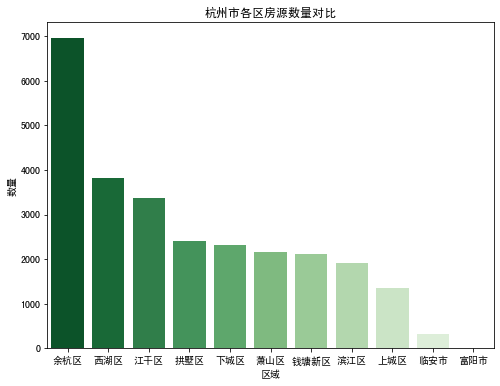

In [154]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(count_area["地理位置"], count_area["数量"], palette='Greens_r')
ax.set_title("杭州市各区房源数量对比")
ax.set_xlabel('区域')
ax.set_ylabel('数量')

In [155]:
pair = [(row["地理位置"], row['数量']) for i, row in count_area.iterrows()]
map_hz = Map(init_opts=opts.InitOpts(width = '800px', height='400px'))
map_hz.add('杭州', pair, '杭州', is_roam=False)
map_hz.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map_hz.set_global_opts(
    title_opts=opts.TitleOpts(title='杭州市各区房源数量对比'),
    legend_opts=opts.LegendOpts(is_show=True),
    visualmap_opts=opts.VisualMapOpts(min_=14, max_=6966)
    )
map_hz.render_notebook()

In [131]:
sum_area = df.groupby("地理位置")["总价/万元"].mean().sort_values(ascending=False).reset_index()

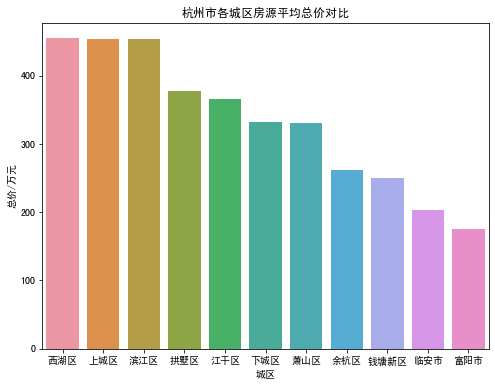

In [133]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(sum_area["地理位置"], sum_area["总价/万元"])
ax.set_title("杭州市各城区房源平均总价对比")
ax.set_xlabel("城区")
ax.set_ylabel("总价/万元")
plt.show()

In [158]:
pair = [(row["地理位置"], round(row["总价/万元"], 2)) for i, row in sum_area.iterrows()]
map2 = Map(init_opts=opts.InitOpts(theme='macarons', width = '800px', height='400px'))
map2.add('杭州', pair, "杭州", is_roam=False)
map2.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map2.set_global_opts(
    title_opts=opts.TitleOpts(title="杭州市各城区房源平均总价对比"),
    legend_opts=opts.LegendOpts(is_show=True),
    visualmap_opts=opts.VisualMapOpts(min_=sum_area["总价/万元"].min(), max_=sum_area["总价/万元"].max()),
    tooltip_opts=opts.TooltipOpts(formatter='{b}:{c}万元')
)
map2.render_notebook()

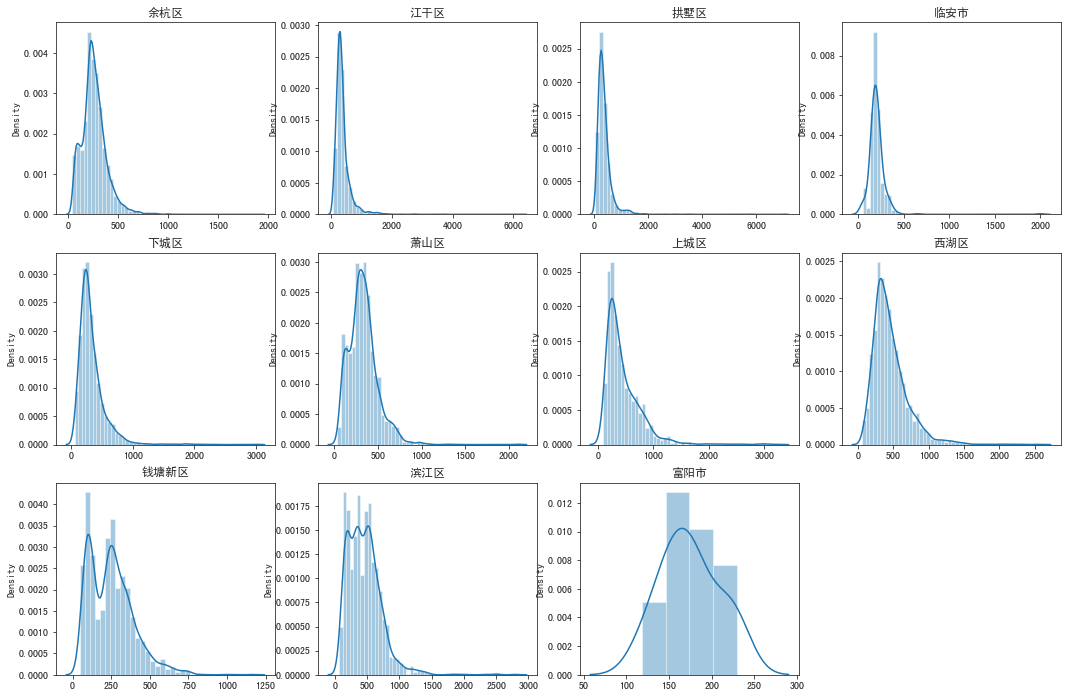

In [161]:
location = df["地理位置"].unique()
plt.figure(1, figsize=(18,12))
with sns.axes_style("ticks"):
    for i in range(len(location)):
        temp = df[df["地理位置"] == location[i]]
        plt.subplot(3, 4, i+1)
        plt.title(location[i])
        sns.distplot(temp["总价/万元"])    
        plt.xlabel('')
plt.show()

In [163]:
price_area = df.groupby("地理位置")["单价数字"].mean().sort_values(ascending=False).reset_index()

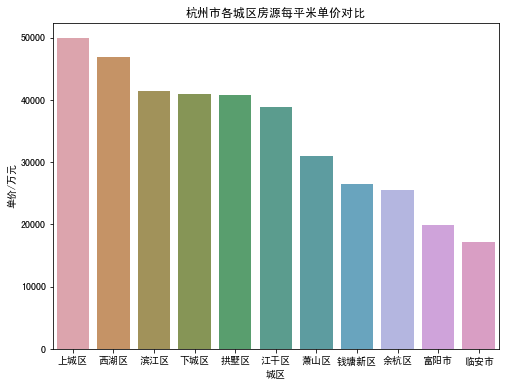

In [165]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(price_area["地理位置"], price_area["单价数字"], saturation=0.5)
ax.set_title("杭州市各城区房源每平米单价对比")
ax.set_xlabel("城区")
ax.set_ylabel("单价/万元")
plt.show()

In [166]:
pair3 = [(row["地理位置"], round(row["单价数字"], 2)) for i, row in price_area.iterrows()]
map3 = Map(init_opts=opts.InitOpts(theme='macarons', width = '800px', height='400px'))
map3.add('杭州', pair3, "杭州", is_roam=False)
map3.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map3.set_global_opts(
    title_opts=opts.TitleOpts(title="杭州市各城区房源每平米单价对比"),
    legend_opts=opts.LegendOpts(is_show=True),
    visualmap_opts=opts.VisualMapOpts(min_=price_area["单价数字"].min(), max_=price_area["单价数字"].max()),
    tooltip_opts=opts.TooltipOpts(formatter='{b}:{c}万元')
)
map3.render_notebook()

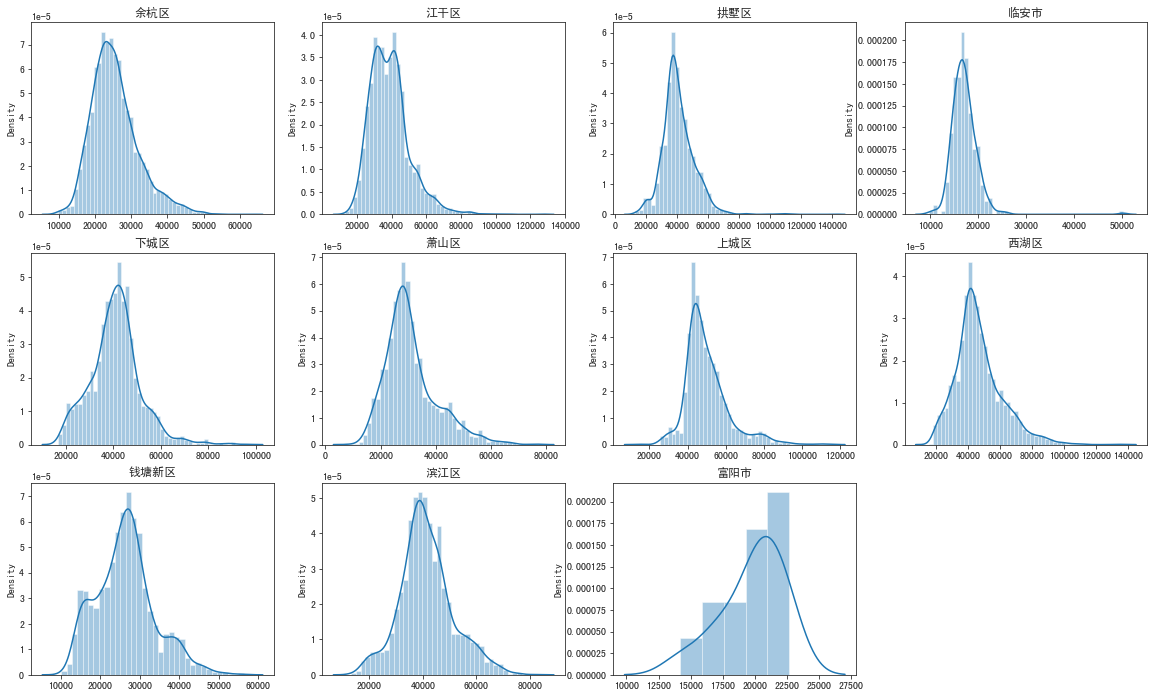

In [168]:
plt.figure(1, figsize=(20, 12))
with sns.axes_style("ticks"):
    for i in range(len(location)):
        temp = df[df["地理位置"] == location[i]]
        plt.subplot(3, 4, i+1)
        plt.title(location[i])
        sns.distplot(temp["单价数字"])
        plt.xlabel('')
plt.show()

In [169]:
attention_area = df.groupby("地理位置")["关注"].sum().sort_values(ascending=False).reset_index()

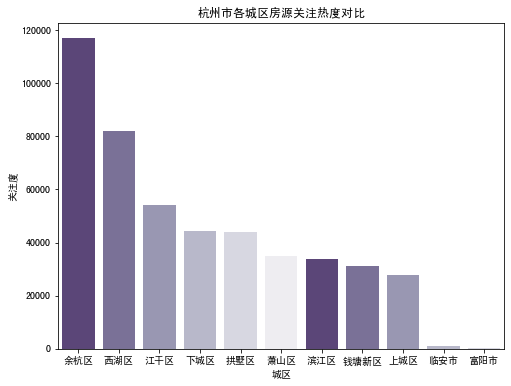

In [170]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(attention_area["地理位置"], attention_area["关注"], palette=sns.color_palette('Purples_r'), saturation=0.5)
ax.set_title("杭州市各城区房源关注热度对比")
ax.set_xlabel("城区")
ax.set_ylabel("关注度")
plt.show()

In [175]:
pair4 = [(row["地理位置"], row["关注"]) for i, row in attention_area.iterrows()]
map4 = Map(init_opts=opts.InitOpts(theme='macarons', width = '800px', height='400px'))
map4.add('杭州', pair4, "杭州", is_roam=False)
map4.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map4.set_global_opts(
    title_opts=opts.TitleOpts(title="杭州市各城区房源关注热度对比"),
    legend_opts=opts.LegendOpts(is_show=True),
    visualmap_opts=opts.VisualMapOpts(min_=272, max_=117016)
)
map4.render_notebook()

In [174]:
attention_area["关注"].min(), attention_area["关注"].max()

(272, 117016)

In [176]:
house_type_attention = data.groupby("户型")["关注"].sum().sort_values(ascending=False).reset_index()

In [177]:
bar1 = Bar(init_opts=opts.InitOpts(theme='wonderland', width='600px', height='400px'))
bar1.add_xaxis(house_type_attention.head(10)["户型"].to_list())
bar1.add_yaxis('',house_type_attention.head(10)["关注"].to_list())
bar1.set_series_opts(label_opts=opts.LabelOpts(is_show=True))
bar1.set_global_opts(title_opts=opts.TitleOpts(title="关注度最高的户型TOP10"), xaxis_opts=opts.AxisOpts(axislabel_opts={"interval":"0"}))
bar1.render_notebook()

In [178]:
df.head()

,地理位置,区域,总价/万元,单价数字,面积,楼龄,建筑类型,楼层位置,层数,装修情况_关键词,室数,厅数,朝向,产权,户型,关注
0,余杭区,余杭临平,210.0,21015.0,99.93,5,板楼,低楼层,33,精装,3,2,"(南, 北)",70年,3室2厅,0
2,余杭区,余杭临平,220.0,17323.0,127.00,5,板楼,高楼层,33,精装,3,2,"(南,)",70年,3室2厅,2
3,余杭区,余杭临平,250.0,18249.0,137.00,5,塔楼,中楼层,33,简装,3,2,"(南,)",70年,3室2厅,4
4,余杭区,余杭临平,215.0,24112.0,89.17,5,板楼,高楼层,34,精装,3,2,"(南,)",70年,3室2厅,1
5,余杭区,余杭临平,220.0,24882.0,88.42,5,塔楼,低楼层,34,精装,3,2,"(南,)",70年,3室2厅,1


In [179]:
orientation_attention = {}

for i, row in df.iterrows():
    for ori in row['朝向']:
        orientation_attention[ori] = orientation_attention.get(ori, 0) + row['关注']

orientation_attention

{'南': 414002,
 '北': 148017,
 '西': 20540,
 '东': 23888,
 '东南': 11375,
 '西北': 2170,
 '东北': 2210,
 '西南': 7320}

In [180]:
orientation_attention = pd.Series(orientation_attention).sort_values(ascending=False).reset_index()
orientation_attention

,index,0
0,南,414002
1,北,148017
2,东,23888
3,西,20540
4,东南,11375
5,西南,7320
6,东北,2210
7,西北,2170


In [181]:
orientation_attention.columns = ['朝向', '关注']

In [186]:
pair5 = [(row["朝向"], row["关注"]) for i, row in orientation_attention.iterrows()]
pie1 = Pie(init_opts=opts.InitOpts(theme='light', width = '1000px', height='600px'))
pie1.add("", pair5, radius=["35%", "75%"])
pie1.set_global_opts(
    title_opts=opts.TitleOpts(title="不同朝向的关注度对比"),
    legend_opts=opts.LegendOpts(is_show=True))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
pie1.render_notebook()

In [187]:
property_right_attention = data.groupby("产权")["关注"].sum().sort_values(ascending=False).reset_index()

In [188]:
pair6 = [(row["产权"], row["关注"]) for i,row in property_right_attention.iterrows()]
pie2 = Pie(init_opts=opts.InitOpts(theme='macarons', width = '800px', height='400px'))
pie2.add('', pair6, radius=["35%", "75%"])
pie2.set_global_opts(
    title_opts=opts.TitleOpts(title="不同产权的关注度对比"),
    legend_opts=opts.LegendOpts(is_show=True)
)
pie2.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
pie2.render_notebook()

In [189]:
location_attention = data.groupby("楼层位置")["关注"].sum().sort_values(ascending=False)

In [190]:
df.head()

,地理位置,区域,总价/万元,单价数字,面积,楼龄,建筑类型,楼层位置,层数,装修情况_关键词,室数,厅数,朝向,产权,户型,关注
0,余杭区,余杭临平,210.0,21015.0,99.93,5,板楼,低楼层,33,精装,3,2,"(南, 北)",70年,3室2厅,0
2,余杭区,余杭临平,220.0,17323.0,127.00,5,板楼,高楼层,33,精装,3,2,"(南,)",70年,3室2厅,2
3,余杭区,余杭临平,250.0,18249.0,137.00,5,塔楼,中楼层,33,简装,3,2,"(南,)",70年,3室2厅,4
4,余杭区,余杭临平,215.0,24112.0,89.17,5,板楼,高楼层,34,精装,3,2,"(南,)",70年,3室2厅,1
5,余杭区,余杭临平,220.0,24882.0,88.42,5,塔楼,低楼层,34,精装,3,2,"(南,)",70年,3室2厅,1


In [191]:
df['层数'].describe()

count    26769.000000
mean        16.200605
std          9.274494
min          1.000000
25%          7.000000
50%         16.000000
75%         23.000000
max         60.000000
Name: 层数, dtype: float64

In [229]:
floor_cut_range = [x for x in range(0, 61, 5)]
floor_cut_label = ['{}~{}层'.format(floor_cut_range[i] + 1, floor_cut_range[i + 1]) for i in range(12)]

In [230]:
floor_cut_range, floor_cut_label

([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
 ['1~5层',
  '6~10层',
  '11~15层',
  '16~20层',
  '21~25层',
  '26~30层',
  '31~35层',
  '36~40层',
  '41~45层',
  '46~50层',
  '51~55层',
  '56~60层'])

In [231]:
data['层数范围'] = pd.cut(data['层数'], floor_cut_range, labels=floor_cut_label)

In [233]:
print(data.loc[data['层数'] == 53, ['层数', '层数范围']])
print(data.loc[data['层数'] == 1, ['层数', '层数范围']])
print(data.loc[data['层数'] == 5, ['层数', '层数范围']])
print(data.loc[data['层数'] == 60, ['层数', '层数范围']])

      层数    层数范围
8484  53  51~55层
       层数  层数范围
1062    1  1~5层
2422    1  1~5层
2427    1  1~5层
2428    1  1~5层
2434    1  1~5层
3767    1  1~5层
4368    1  1~5层
6414    1  1~5层
8833    1  1~5层
9200    1  1~5层
10888   1  1~5层
10889   1  1~5层
10890   1  1~5层
17112   1  1~5层
17113   1  1~5层
17114   1  1~5层
17830   1  1~5层
24890   1  1~5层
25239   1  1~5层
25240   1  1~5层
25242   1  1~5层
25248   1  1~5层
25249   1  1~5层
25250   1  1~5层
26735   1  1~5层
30482   1  1~5层
30490   1  1~5层
       层数  层数范围
213     5  1~5层
218     5  1~5层
1124    5  1~5层
1378    5  1~5层
1379    5  1~5层
...    ..   ...
30705   5  1~5层
30706   5  1~5层
30708   5  1~5层
30714   5  1~5层
30716   5  1~5层

[1193 rows x 2 columns]
      层数    层数范围
7494  60  56~60层


In [234]:
floor_attention = data.groupby("层数范围")["关注"].sum().sort_values(ascending=False).reset_index()

In [235]:
bar2 = Bar(init_opts=opts.InitOpts(theme='vintage', width = '600px', height='400px'))
bar2.add_xaxis(floor_attention["层数范围"].to_list())
bar2.add_yaxis("关注度", floor_attention["关注"].to_list())
bar2.set_series_opts(label_opts=opts.LabelOpts(is_show=True))
bar2.set_global_opts(title_opts=opts.TitleOpts(title="不同楼层的关注度对比"), xaxis_opts=opts.AxisOpts(axislabel_opts={"interval":"0","rotate":45}))
bar2.render_notebook()

In [238]:
decoration_attention = data.groupby("装修情况_关键词")["关注"].sum().sort_values(ascending=False).reset_index()

In [240]:
bar3 = Bar(init_opts=opts.InitOpts(theme='westeros', width = '600px', height='275px'))
bar3.add_xaxis(decoration_attention["装修情况_关键词"].to_list())
bar3.add_yaxis("关注度", decoration_attention["关注"].to_list())
bar3.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='right'))
bar3.set_global_opts(title_opts=opts.TitleOpts(title="不同装修情况的关注度对比"), xaxis_opts=opts.AxisOpts(axislabel_opts={"interval":"0"}))
bar3.reversal_axis()
bar3.render_notebook()